In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

# Đường dẫn file
CSV_PATH = "abalone_data.csv"
df = pd.read_csv(CSV_PATH)

# a Kích thước và chiều
print("\n--- a. Kích thước & chiều dữ liệu ---")
print(f"Số hàng (mẫu): {df.shape[0]}")
print(f"Số cột (thuộc tính): {df.shape[1]}")

# b Kiểu dữ liệu
print("\n--- b. Kiểu dữ liệu của các thuộc tính ---")
display(df.dtypes.to_frame('Kiểu dữ liệu'))

# c Số lượng thực thể theo nhãn
print("\n--- c. Phân bố giá trị nhãn 'Sex' ---")
sex_counts = df['Sex'].value_counts().sort_index()
display(sex_counts.to_frame('Số lượng'))

print("\n--- c. Phân bố giá trị nhãn 'Rings' ---")
rings_counts = df['Rings'].value_counts().sort_index()
display(rings_counts.to_frame('Số lượng'))

# d Min, Max, Mean của các cột số thực (loại trừ Sex và Rings nếu coi là categorical)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Sex', 'Rings']]

print("\n--- d. Min, Max, Mean của các cột số thực ---")
stats = df[numeric_cols].agg(['min', 'max', 'mean']).T
stats.columns = ['Min', 'Max', 'Mean']
stats = stats.round(4)
display(stats)


--- a. Kích thước & chiều dữ liệu ---
Số hàng (mẫu): 4177
Số cột (thuộc tính): 9

--- b. Kiểu dữ liệu của các thuộc tính ---


,Kiểu dữ liệu
Sex,int64
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64
Rings,int64



--- c. Phân bố giá trị nhãn 'Sex' ---


,Số lượng
Sex,
1,1528
2,1307
3,1342



--- c. Phân bố giá trị nhãn 'Rings' ---


,Số lượng
Rings,
1,1
2,1
3,15
4,57
5,115
6,259
7,391
8,568
9,689



--- d. Min, Max, Mean của các cột số thực ---


,Min,Max,Mean
Length,0.0750,0.8150,0.5240
Diameter,0.0550,0.6500,0.4079
Height,0.0000,1.1300,0.1395
Whole weight,0.0020,2.8255,0.8287
Shucked weight,0.0010,1.4880,0.3594
Viscera weight,0.0005,0.7600,0.1806
Shell weight,0.0015,1.0050,0.2388


Kích thước dữ liệu: (4177, 8)

Các cột:
['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

Số đặc trưng liên tục: 7
Đặc trưng: ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

Áp dụng PCA...
Explained variance ratio: [0.90787315 0.03991891]
Tổng variance được giải thích: 0.9478

Đã lưu biểu đồ vào file 'abalone_visualization.png'


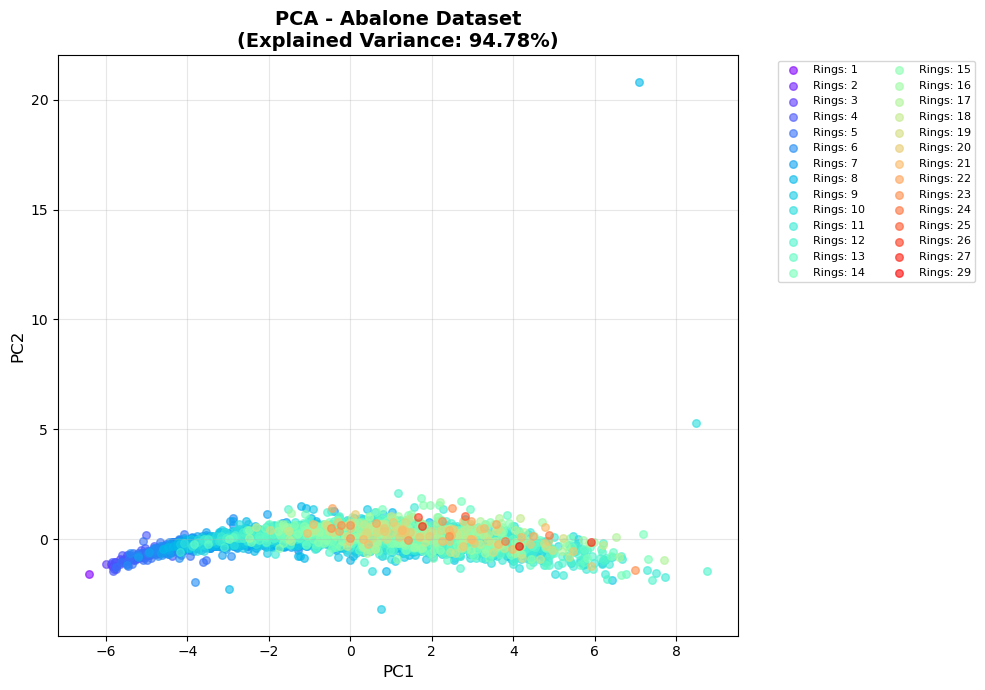


THỐNG KÊ DỮ LIỆU

Số mẫu: 4177
Số đặc trưng liên tục: 7
Số nhãn (Rings) khác nhau: 28
Phạm vi Rings: 1 - 29

Phân bố Rings:
  Rings 1: 1 mẫu (0.0%)
  Rings 2: 1 mẫu (0.0%)
  Rings 3: 15 mẫu (0.4%)
  Rings 4: 57 mẫu (1.4%)
  Rings 5: 115 mẫu (2.8%)
  Rings 6: 259 mẫu (6.2%)
  Rings 7: 391 mẫu (9.4%)
  Rings 8: 568 mẫu (13.6%)
  Rings 9: 689 mẫu (16.5%)
  Rings 10: 634 mẫu (15.2%)
  Rings 11: 487 mẫu (11.7%)
  Rings 12: 267 mẫu (6.4%)
  Rings 13: 203 mẫu (4.9%)
  Rings 14: 126 mẫu (3.0%)
  Rings 15: 103 mẫu (2.5%)
  Rings 16: 67 mẫu (1.6%)
  Rings 17: 58 mẫu (1.4%)
  Rings 18: 42 mẫu (1.0%)
  Rings 19: 32 mẫu (0.8%)
  Rings 20: 26 mẫu (0.6%)
  Rings 21: 14 mẫu (0.3%)
  Rings 22: 6 mẫu (0.1%)
  Rings 23: 9 mẫu (0.2%)
  Rings 24: 2 mẫu (0.0%)
  Rings 25: 1 mẫu (0.0%)
  Rings 26: 1 mẫu (0.0%)
  Rings 27: 2 mẫu (0.0%)
  Rings 29: 1 mẫu (0.0%)

PHÂN TÍCH THÀNH PHẦN CHÍNH (PCA)
PC1 variance: 0.9079
PC2 variance: 0.0399

Các đặc trưng quan trọng nhất cho PC1:
  Whole weight: 0.3907
  Diameter:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("abalone_data.csv")
target = df['Rings']
df = df.drop('Rings', axis=1)

print(f"Kích thước dữ liệu: {df.shape}")
print(f"\nCác cột:\n{df.columns.tolist()}")

# Chọn chỉ các cột liên tục (bỏ cột 'Sex' là categorical)
continuous_columns = [col for col in df.columns if col != 'Sex']
X = df[continuous_columns].values

print(f"\nSố đặc trưng liên tục: {len(continuous_columns)}")
print(f"Đặc trưng: {continuous_columns}")

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Thu giảm chiều với PCA
print("\nÁp dụng PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Tổng variance được giải thích: {sum(pca.explained_variance_ratio_):.4f}")

# Chuyển target thành số nếu cần
if isinstance(target, pd.Series):
    y = target.astype(int).values
else:
    y = np.array(target, dtype=int)

# Tạo colormap cho các nhãn
unique_labels = np.unique(y)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
color_map = {label: colors[i] for i, label in enumerate(unique_labels)}

# Vẽ biểu đồ - CHỈ 1 BIỂU ĐỒ
plt.figure(figsize=(10, 7))

for label in unique_labels:
    mask = y == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=[color_map[label]], label=f'Rings: {label}',
               alpha=0.6, s=30)

plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title(f'PCA - Abalone Dataset\n(Explained Variance: {sum(pca.explained_variance_ratio_):.2%})', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize=8)

plt.tight_layout()
plt.show()

# In thống kê
print("\n" + "="*60)
print("THỐNG KÊ DỮ LIỆU")
print("="*60)
print(f"\nSố mẫu: {len(X)}")
print(f"Số đặc trưng liên tục: {len(continuous_columns)}")
print(f"Số nhãn (Rings) khác nhau: {len(unique_labels)}")
print(f"Phạm vi Rings: {y.min()} - {y.max()}")
print(f"\nPhân bố Rings:")
unique, counts = np.unique(y, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  Rings {label}: {count} mẫu ({count/len(y)*100:.1f}%)")

# Thống kê theo phương pháp
print("\n" + "="*60)
print("PHÂN TÍCH THÀNH PHẦN CHÍNH (PCA)")
print("="*60)
print(f"PC1 variance: {pca.explained_variance_ratio_[0]:.4f}")
print(f"PC2 variance: {pca.explained_variance_ratio_[1]:.4f}")
print(f"\nCác đặc trưng quan trọng nhất cho PC1:")
pc1_importance = np.abs(pca.components_[0])
important_features_pc1 = sorted(zip(continuous_columns, pc1_importance), 
                                key=lambda x: x[1], reverse=True)
for feat, imp in important_features_pc1[:3]:
    print(f"  {feat}: {imp:.4f}")

print(f"\nCác đặc trưng quan trọng nhất cho PC2:")
pc2_importance = np.abs(pca.components_[1])
important_features_pc2 = sorted(zip(continuous_columns, pc2_importance), 
                                key=lambda x: x[1], reverse=True)
for feat, imp in important_features_pc2[:3]:
    print(f"  {feat}: {imp:.4f}")

Best k (uniform) = 23, F1 = 0.6513
Best k (distance) = 18, F1 = 0.6557


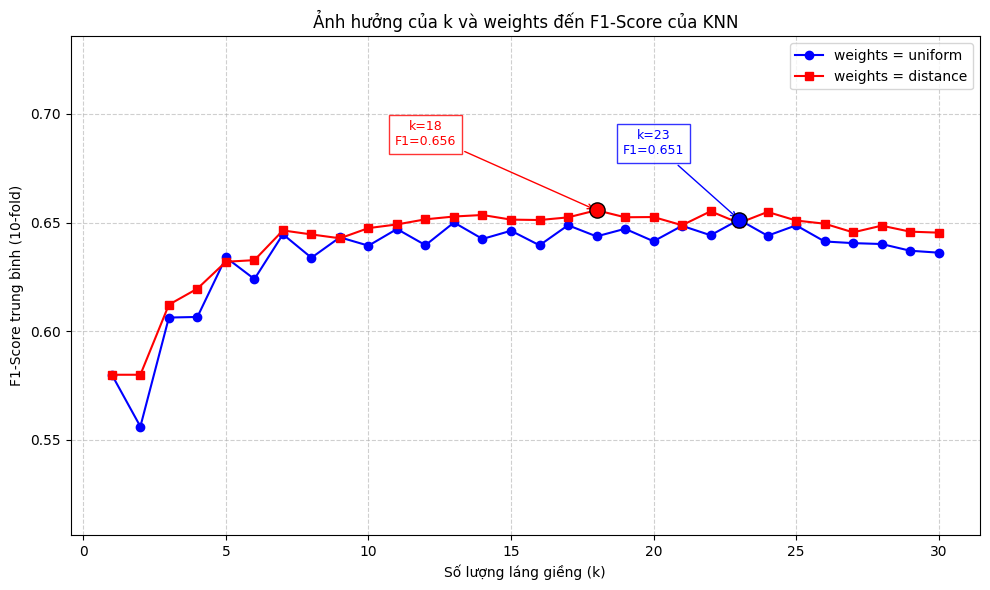


🔹 Đang tinh chỉnh tham số cho KNN ...

🔹 Đang tinh chỉnh tham số cho RandomForest ...

🔹 Đang tinh chỉnh tham số cho SVM ...

📊 Kết quả so sánh hiệu năng:
          Model                                        Best Params  F1-Score
0           SVM                         {'C': 10, 'kernel': 'rbf'}  0.684729
1  RandomForest  {'max_depth': 10, 'min_samples_split': 5, 'n_e...  0.673211
2           KNN         {'n_neighbors': 18, 'weights': 'distance'}  0.655659


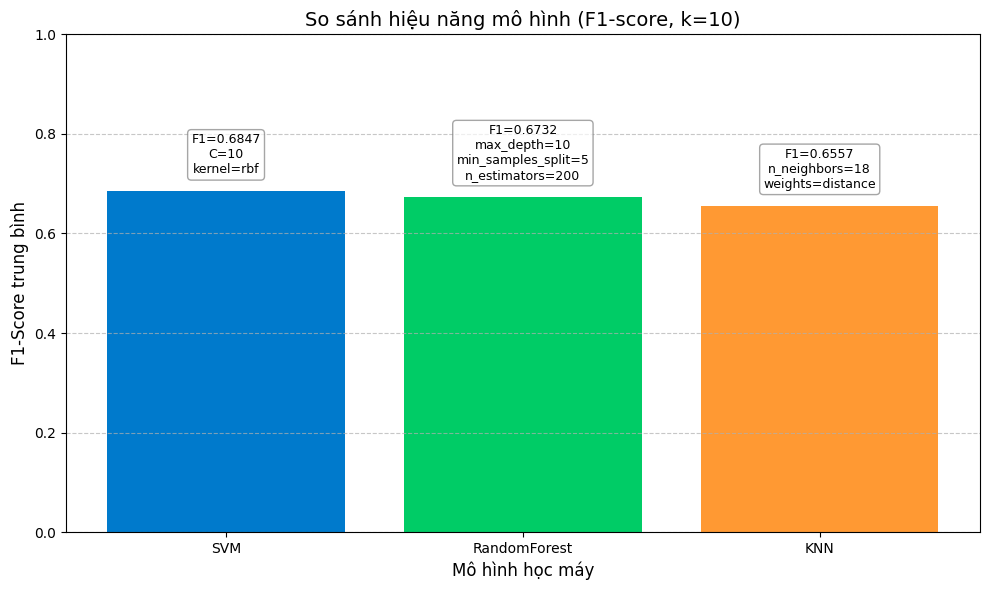

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# --- 1. Đọc dữ liệu ---
df = pd.read_csv("abalone_data.csv")

# --- 2. Mã hóa cột phân loại ---
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# --- 3. Chia dữ liệu ---
X = df.drop('Rings', axis=1)
y = df['Rings']

# ⚙️ Chuyển bài toán Regression -> Classification (3 nhóm tuổi)
y = pd.cut(y, bins=[0, 8, 11, 30], labels=[0, 1, 2])
y = y.astype(int)

# --- 4. Chuẩn hóa ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 5. 10-fold Cross Validation ---
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# =========================================================
# 🎯 Vẽ biểu đồ ảnh hưởng của k đến F1-score (KNN)
# =========================================================
# --- Tìm k tối ưu ---
print("\nTìm tham số tối ưu cho KNN...")
neighbors = list(range(1, 31))
f1_uniform = []
f1_distance = []

# Tính F1-score trung bình cho mỗi k và mỗi loại weight
for k in neighbors:
    knn_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_d = KNeighborsClassifier(n_neighbors=k, weights='distance')
    f1_u = cross_val_score(knn_u, X_scaled, y, cv=kf, scoring=make_scorer(f1_score, average='macro')).mean()
    f1_d = cross_val_score(knn_d, X_scaled, y, cv=kf, scoring=make_scorer(f1_score, average='macro')).mean()

    f1_uniform.append(f1_u)
    f1_distance.append(f1_d)

# Chuyển sang numpy array để xử lý dễ hơn
f1_uniform = np.array(f1_uniform)
f1_distance = np.array(f1_distance)

# Tìm best k và giá trị F1 tương ứng
best_idx_uniform = int(np.argmax(f1_uniform))
best_k_uniform = neighbors[best_idx_uniform]
best_f1_uniform = float(f1_uniform[best_idx_uniform])

best_idx_distance = int(np.argmax(f1_distance))
best_k_distance = neighbors[best_idx_distance]
best_f1_distance = float(f1_distance[best_idx_distance])

print(f"Best k (uniform) = {best_k_uniform}, F1 = {best_f1_uniform:.4f}")
print(f"Best k (distance) = {best_k_distance}, F1 = {best_f1_distance:.4f}")

# --- VẼ BIỂU ĐỒ ---
plt.figure(figsize=(10,6))
plt.plot(neighbors, f1_uniform, marker='o', label='weights = uniform', color='blue')
plt.plot(neighbors, f1_distance, marker='s', label='weights = distance', color='red')

# Đánh dấu điểm tốt nhất (dùng edgecolors để tránh warning)
plt.scatter([best_k_uniform], [best_f1_uniform], color='blue', edgecolors='black', s=120, zorder=5)
plt.scatter([best_k_distance], [best_f1_distance], color='red', edgecolors='black', s=120, zorder=5)

# Annotate (mũi tên) cho uniform (nằm bên trái và trên điểm)
plt.annotate(
    f"k={best_k_uniform}\nF1={best_f1_uniform:.3f}",
    xy=(best_k_uniform, best_f1_uniform),
    xytext=(best_k_uniform-3, best_f1_uniform+0.03),
    arrowprops=dict(arrowstyle="->", color='blue'),
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue'),
    color='blue',
    fontsize=9,
    ha='center'
)

# Annotate (mũi tên) cho distance (nằm bên phải và trên/bên dưới tùy chỗ trống)
# Nếu ấn tượng chồng, bạn có thể điều chỉnh xytext thủ công
plt.annotate(
    f"k={best_k_distance}\nF1={best_f1_distance:.3f}",
    xy=(best_k_distance, best_f1_distance),
    xytext=(best_k_distance-6, best_f1_distance+0.03),
    arrowprops=dict(arrowstyle="->", color='red'),
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'),
    color='red',
    fontsize=9,
    ha='center'
)

plt.xlabel('Số lượng láng giềng (k)')
plt.ylabel('F1-Score trung bình (10-fold)')
plt.title('Ảnh hưởng của k và weights đến F1-Score của KNN')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

ymin = min(f1_uniform.min(), f1_distance.min()) - 0.05
ymax = max(f1_uniform.max(), f1_distance.max()) + 0.08
plt.ylim(max(0, ymin), min(1.0, ymax))

plt.tight_layout()
plt.show()


# =========================================================
# 🧠 Huấn luyện + tinh chỉnh các mô hình
# =========================================================
models = {
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": list(range(1, 31)), "weights": ["uniform", "distance"]}
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "SVM": {
        "model": SVC(random_state=42),
        "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    }
}

results = []
for name, cfg in models.items():
    print(f"\n🔹 Đang tinh chỉnh tham số cho {name} ...")
    grid = GridSearchCV(
        cfg["model"], cfg["params"],
        cv=kf, scoring=make_scorer(f1_score, average="macro"),
        n_jobs=-1
    )
    grid.fit(X_scaled, y)
    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "F1-Score": grid.best_score_
    })

# =========================================================
# 📊 Hiển thị bảng kết quả
# =========================================================
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
print("\n📊 Kết quả so sánh hiệu năng:")
print(results_df)

# =========================================================
# 🎨 Vẽ biểu đồ so sánh hiệu năng các mô hình
# =========================================================
plt.figure(figsize=(10,6))
bars = plt.bar(results_df["Model"], results_df["F1-Score"], color=['#007acc','#00cc66','#ff9933'])
plt.title("So sánh hiệu năng mô hình (F1-score, k=10)", fontsize=14)
plt.xlabel("Mô hình học máy", fontsize=12)
plt.ylabel("F1-Score trung bình", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị F1-score và tham số trên từng cột
for bar, (_, row) in zip(bars, results_df.iterrows()):
    yval = bar.get_height()
    params_text = "\n".join([f"{k}={v}" for k, v in row["Best Params"].items()])
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.03,
        f"F1={yval:.4f}\n{params_text}",
        ha='center', va='bottom', fontsize=9,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.3')
    )

plt.tight_layout()
plt.show()
